In [15]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm_notebook as tqdm
import tweepy
from cascade import Cascade

In [16]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
pd.set_option('display.max_colwidth', -1)
cas = Cascade()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
model_path = os.path.join(get_git_root(os.getcwd()),"models")

In [17]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [18]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

In [19]:
## looking at the cascade 182 (juul)
cascade3 = hexagon_data.loc[hexagon_data.retweetCount == 182]

In [20]:
list(cascade3.tweetText.head(1))[0]

'The #Juul ruining friendships pt.2 https://t.co/xGno0mLpwp'

In [148]:
# taking the most top in the timestamp as the source node
source_node = cascade3.head(1).userID.values[0]

In [26]:
## getting the users
users = list(cascade3.userID.unique())
users.remove(source_node)

In [147]:
G_3 = cas.get_cascade(hexagon_data, source_node, users, 2)




  0%|          | 0/133 [00:00<?, ?it/s]


  1%|          | 1/133 [00:00<01:14,  1.77it/s]


  2%|▏         | 2/133 [00:00<01:01,  2.11it/s]


  2%|▏         | 3/133 [00:01<00:53,  2.44it/s]


  3%|▎         | 4/133 [00:01<00:48,  2.67it/s]


  4%|▍         | 5/133 [00:01<00:43,  2.92it/s]


  5%|▍         | 6/133 [00:01<00:40,  3.14it/s]


  5%|▌         | 7/133 [00:02<00:36,  3.41it/s]


  6%|▌         | 8/133 [00:02<00:37,  3.38it/s]


  7%|▋         | 9/133 [00:02<00:36,  3.43it/s]


  8%|▊         | 10/133 [00:02<00:34,  3.62it/s]


  8%|▊         | 11/133 [00:03<00:32,  3.76it/s]


  9%|▉         | 12/133 [00:03<00:30,  3.91it/s]


 10%|▉         | 13/133 [00:03<00:30,  3.88it/s]


 11%|█         | 14/133 [00:03<00:30,  3.92it/s]


 11%|█▏        | 15/133 [00:04<00:30,  3.87it/s]


 12%|█▏        | 16/133 [00:04<00:30,  3.86it/s]


 13%|█▎        | 17/133 [00:04<00:30,  3.79it/s]


 14%|█▎        | 18/133 [00:05<00:30,  3.82it/s]


 14%|█▍        | 19/133 [00:05<00:30,  3.71it/

finding connection for followers network might take some time






100%|██████████| 1/1 [00:00<00:00,  4.21it/s]





  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 14.09it/s]


  0%|          | 0/1 [00:00<?, ?it/s]

at level 1
finding connection for followers network might take some time






100%|██████████| 1/1 [00:00<00:00,  3.97it/s]





  0%|          | 0/1 [00:00<?, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 14.19it/s]

at level 2


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshayuppal/nltk_data...
[nltk_data]   Package wordnet is already up-t

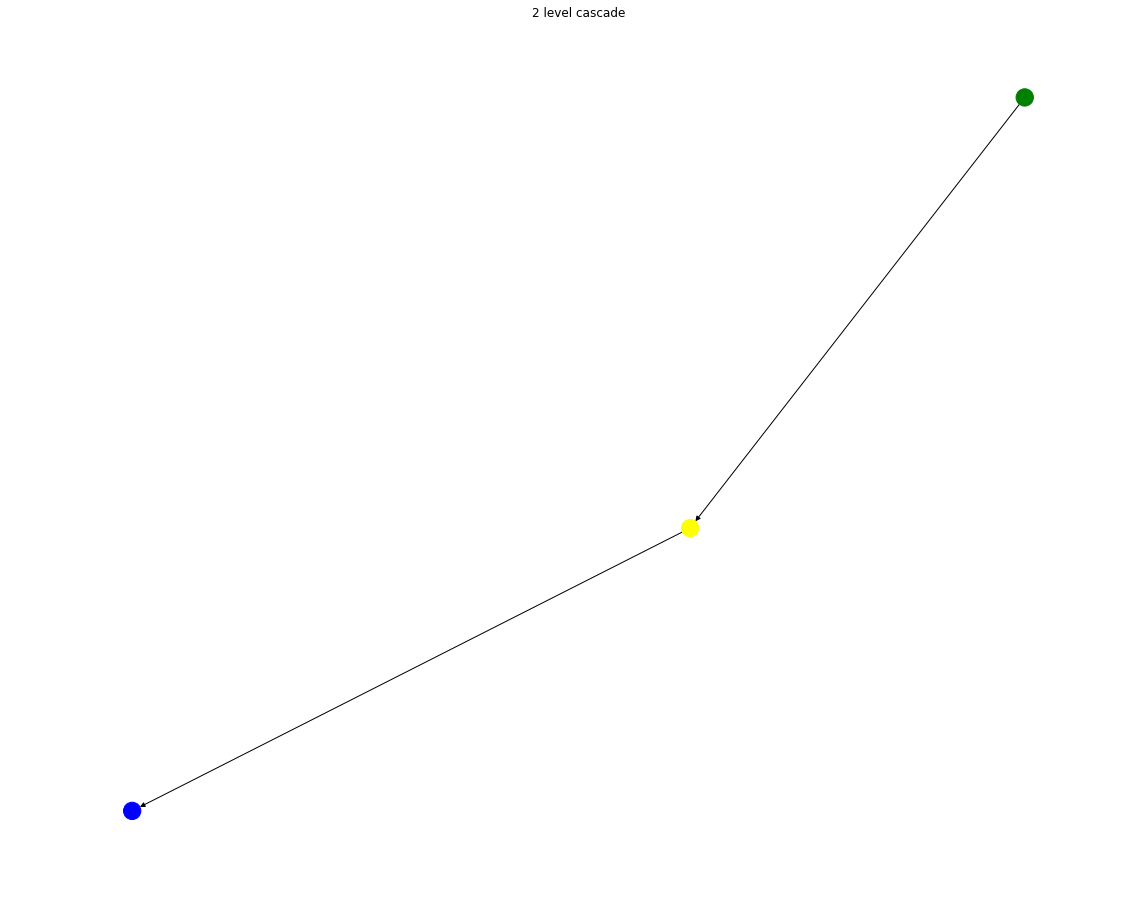

In [149]:
%matplotlib inline
plt.figure(figsize=(15,15))
nx.draw(G,with_labels=False,node_color=color_map)
ax = plt.gca()
ax.set_aspect('equal')
ax.set_axis_off()
plt.title("2 level cascade")
plt.show()

In [139]:
for node in (G.nodes()):
    print(node, G.nodes[node])

4357270032 {'friends': 370, 'depth': 1, 'followers': 239}
2436000656 {'friends': 171, 'depth': 0, 'followers': 107}
1416614886 {'friends': 657, 'depth': 2, 'followers': 221}


### dump the graph

In [152]:
# gpickle the graph
nx.write_gpickle(G,"/Users/akshayuppal/Desktop/thesis/twitter_juul/models/G_3.gpickle")

In [33]:
## read the file
G = nx.read_gpickle(os.path.join(model_path,"cascade3.gpickle"))

In [151]:
G_3.nodes[4357270032]

{'friends': 370, 'followers': 239, 'level': 1}